## Project Summary
This analysis identifies key revenue drivers in the Superstore sales data including product performance, regional strengths and seasonal trends. The results can help guide marketing strategy, inventory plannning and resouce allocation.

### Loading and exploring the data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# load the data
df = pd.read_csv("/kaggle/input/sales-forecasting/train.csv")

In [2]:
# check the dataframe
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
# explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
# explore hom many duplicated rows there are
df.duplicated().sum()

0

In [5]:
#Convert the Date column to proper datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)

In [6]:
# create a new 'Month' feature for time-based analysis
df['Month'] = df['Order Date'].dt.to_period('M')

## Superstore Sales Analysis

### Data Preview
- This dataset contains retail sales transactions including products, categories, regions
  and financial metrics such as sales profit.

### Dataset Overview
- The dataset contains 9,800 rows and 18 columns.
- Key columns include Order Date, Category, Sales, Segment and Region.
- The Date column was initially stored as a string and has been converted to datetime format.
- There are no duplicated rows.
- Missing values appear in the Postal Code column and several others.
- Missing values have been handled approriately on the columns's importance.

## 1. Top product by revenue

<Axes: title={'center': 'Sales of Products'}, xlabel='Product Name', ylabel='Revenue'>

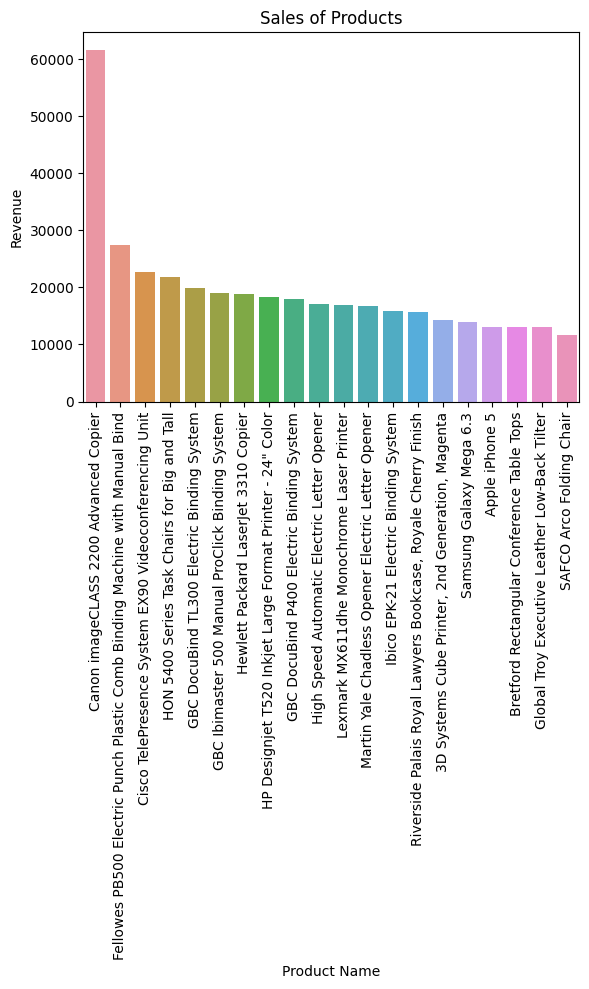

In [7]:
# select procucts which generate 15 of the most revenue.
prodcut_revenue_df = df.groupby('Product Name')['Sales'].sum().sort_values(ascending = False).head(20)

# create bar chart
plt.title('Sales of Products')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation = 90)
sns.barplot(x = prodcut_revenue_df.index, y = prodcut_revenue_df.values)


### What I found
- Canon imageCLASS 2200 Advanced Copier generates the most revenue.

## 2. Best performing product categories

<Axes: title={'center': 'Performance of each Category'}, xlabel='Category', ylabel='Revenue'>

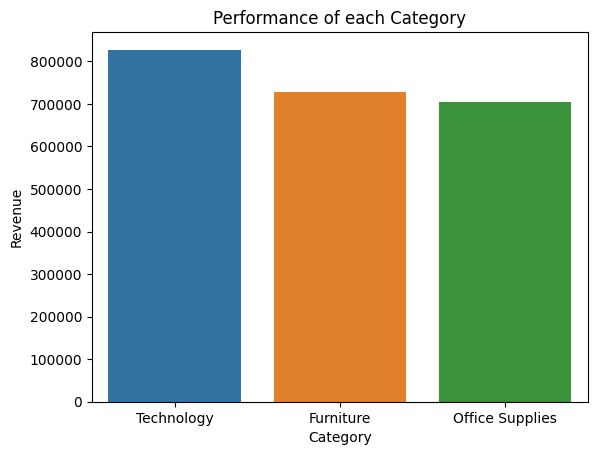

In [8]:
# group category by sales
prodcut_category_df = df.groupby('Category')['Sales'].sum().sort_values(ascending = False)

# create bar chart
plt.title('Performance of each Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.xticks(rotation = 0)
sns.barplot(x = prodcut_category_df.index, y = prodcut_category_df.values)

### What I found
- The technology category generates the highest sales.

## 3. Revenue by region

<Axes: title={'center': 'Performance of each Region'}, xlabel='Region', ylabel='Revenue'>

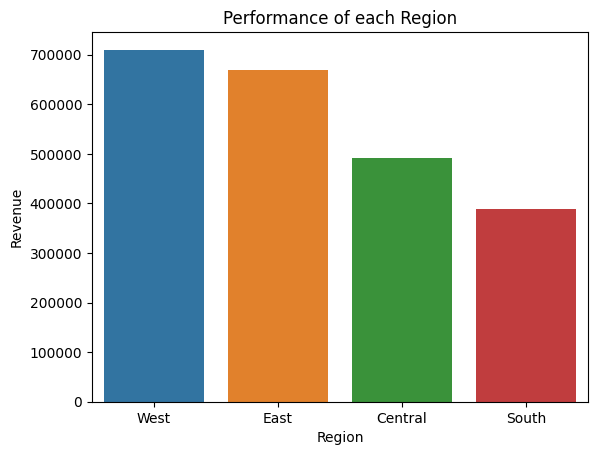

In [9]:
# group region by sales
prodcut_region_df = df.groupby('Region')['Sales'].sum().sort_values(ascending = False)

# create bar chart
plt.title('Performance of each Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.xticks(rotation = 0)
sns.barplot(x = prodcut_region_df.index, y = prodcut_region_df.values)

### What I found
- The West region performs the best in sales.
- There is strong customer demand and high market share in the West region.

## 4. Monthly sales trend

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


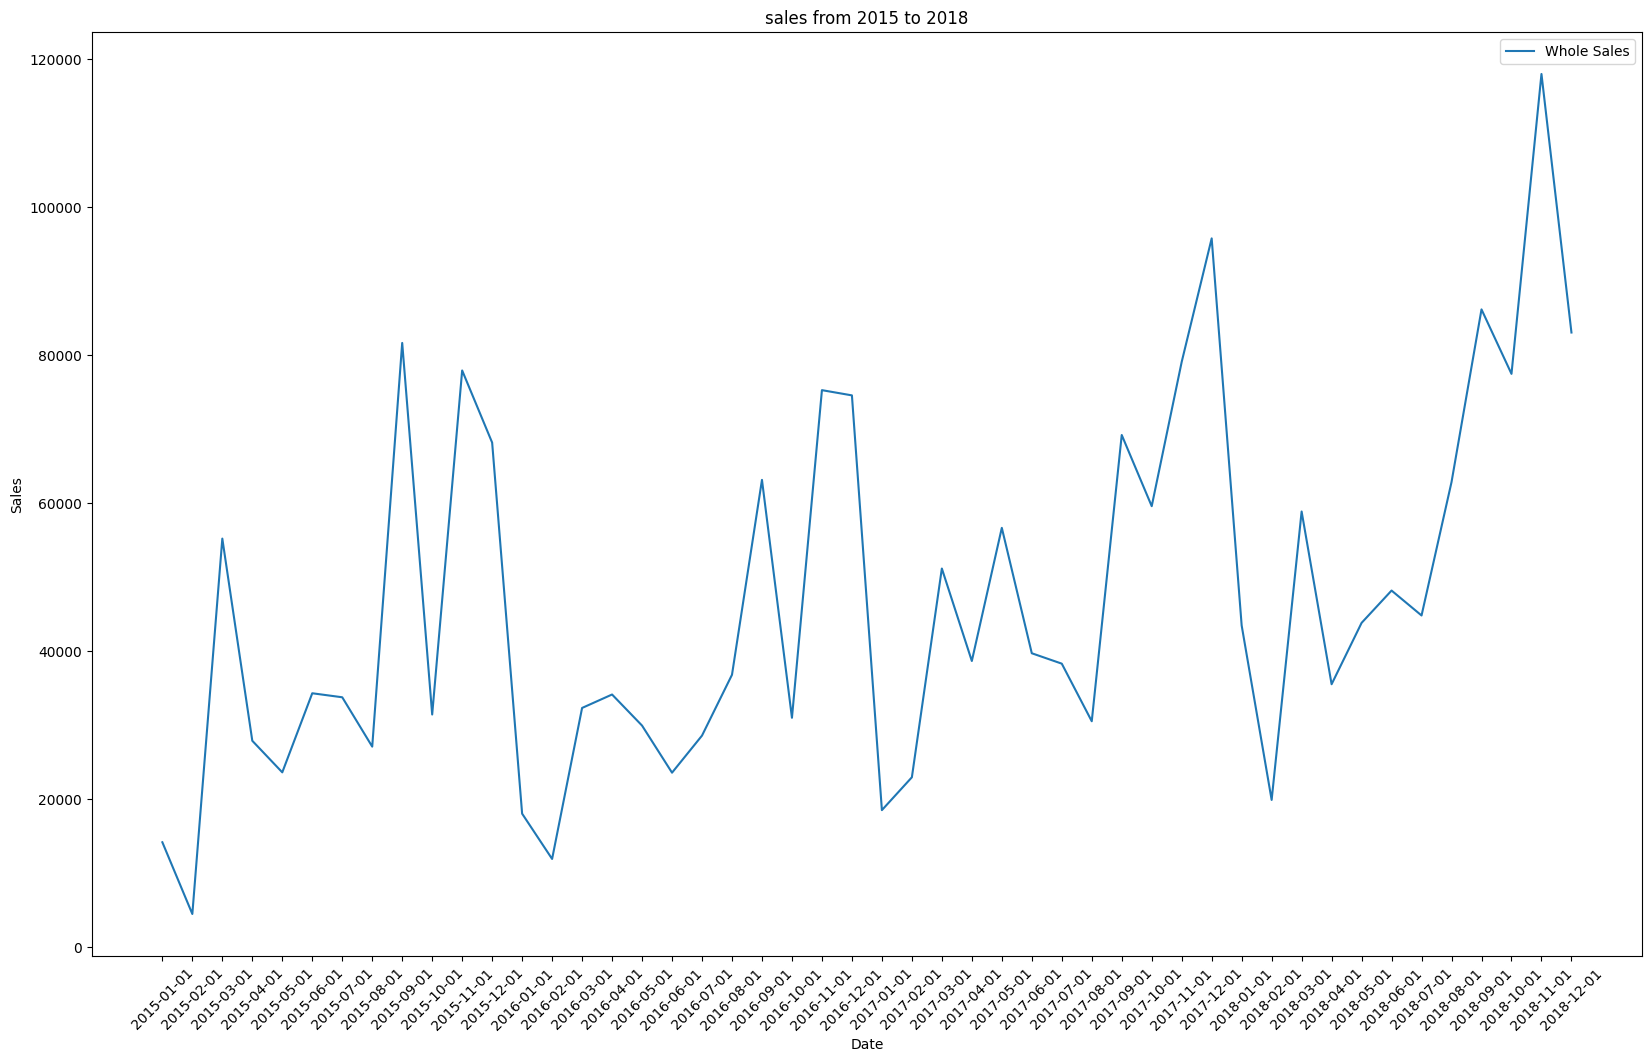

In [10]:
# group sales by each month and sort them
month_to_day_index = ["{}-01".format(sales_date) for sales_date in df["Sales"].groupby(df['Month']).sum().index]
monthly_sales = pd.DataFrame(df["Sales"].groupby(df['Month']).sum().values,
                     index = month_to_day_index)
monthly_sales = monthly_sales.rename(columns = {0: 'Whole Sales'})

# visualizing the sales data from 2016 to 2018 with line plot
plt.figure(figsize = (20,12))
plt.title('sales from 2015 to 2018')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation = 45)
sales_lineplot = sns.lineplot(data = monthly_sales)
sns.set_style('whitegrid')

### WHat I found
- Sales peaks in Q4 each year.
- This indicates high demand during the holiday season.

## 5. Revenue by segment

<Axes: title={'center': 'Performance of each Segment'}, xlabel='Segment', ylabel='Revenue'>

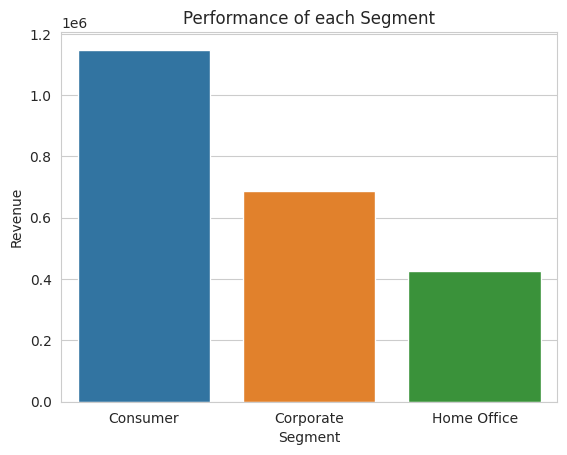

In [11]:
# group segment by sales
prodcut_segment_df = df.groupby('Segment')['Sales'].sum().sort_values(ascending = False)

# create bar chart
plt.title('Performance of each Segment')
plt.xlabel('Segment')
plt.ylabel('Revenue')
plt.xticks(rotation = 0)
sns.barplot(x = prodcut_segment_df.index, y = prodcut_segment_df.values)

### What I found
- The Consumer sgment is the most valuable segment in terms of revenue.
- The consumer segment should be a primary focus for growth opportunities.

## 📌 Business Recommendations

1. Increase marketing budget and inventory in the West region.
2. Increase inventory and staffing before Q4 to prepare for seasonal demand.
3. Tanget loyalty programs toward the Customer segment to increase repeat purchases.